# Voting classifiers

Even if all classifiers in an ensemble are weak, voting can improve strength drastically provided a sufficent number of weak, diverse classifiers. 

### Hard voting
Simply the majority vote/modal response.
This works by the law of large numbers. If there is a slightly greater chance an observation is going to be classified correctly as opposed to incorrectly. It should be classifed correctly more times than incorrectly in the ensemble. So by voting, we should be able to classify it correctly.

The best way to do this is to use very different algorithms to train these, as they will hopefully make different errors. 

### soft voting
Basically averaging proabilities
Most classifiers can output probabilities, but not all e.g. SVC. If we use these in the ensemble, we can average the probabilities out across classifiers, giving emenece to classifiers that are more certain of the correct class.  

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ClassificationReport

from tqdm import tqdm_notebook

In [199]:
X,y = make_moons(n_samples=1000, noise=0.6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
ensemble = [("logistic", LogisticRegression()),
            ("forest", RandomForestClassifier()),
            ("svc", SVC(probability=True))]

hard_voting_clf = VotingClassifier(estimators=ensemble,
                                   voting="hard")

soft_voting_clf = VotingClassifier(estimators=ensemble,
                                   voting="soft")

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


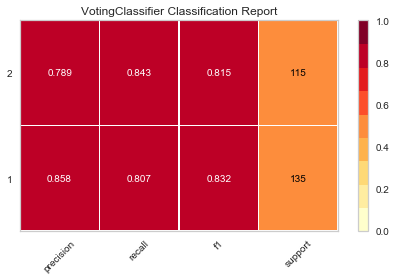

In [32]:
visualizer = ClassificationReport(hard_voting_clf,
                                  classes=["1","2"],
                                  support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


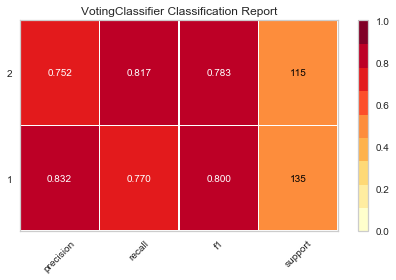

In [33]:
visualizer = ClassificationReport(soft_voting_clf,
                                  classes=["1","2"],
                                  support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


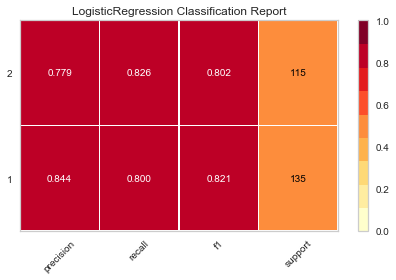

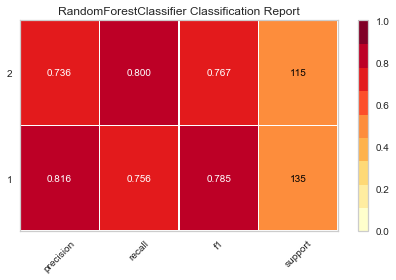

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


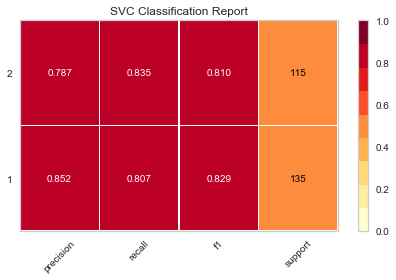

In [34]:
for name,clf in ensemble:
    visualizer = ClassificationReport(clf,
                                  classes=["1","2"],
                                  support=True)
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    g = visualizer.poof()  

we see that (hard) voting is better than all of these

## Bagging and pasting

Bagging uses the same algorithm, but trains them on different data. Bagging (bootstrap aggregating) is sampleing with replacement. Pasting is the same, but with random sampling without replacement.

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                           n_estimators=500,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1)

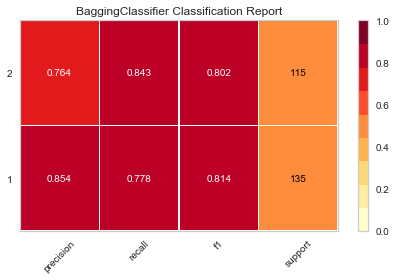

In [41]:
visualizer = ClassificationReport(bag_clf,
                                  classes=["1","2"],
                                  support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

Typically bagging means more bias than pasting as there is more varieation in the training data through re-sampling. This does act to reduce varience as models tend to be less correlated.

### out of bag evalutation

Since some of the values in the training data are resampled, 1/3rd is left out or out-of-bag.

This beasically gives us an evaluation set for free. 

### random patches and random subspaces

We don't just have to sample across observations, we can sample across features too. There are two ways of doing this.

- Patches; sample features and observations
- subspace; sample features but keep all observations

Basically trading increase in bias for lower varience.

# Random forests

Decision trees with bagging, with max samples set to the size of the training set.
The way random forest is different is that it takes the 'best' split from a random subset of features. Again trading hihger bias for lower varience.

## extremely random forests
Picks random thresholds rather than searching for the best split. Much faster to train. 

## Feature importance

How much do the nodes that use this feature reduce impurity on (weighted) average. This then scaled so the sum of all importances = 1. 

In [57]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()

X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [49]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)

In [50]:
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
scores=[]
for name, score in zip(iris["feature_names"], rf_clf.feature_importances_):
    print(f"{name}: {score}")
    scores.append(score)
    
print(f"total: {np.sum(scores)}")

sepal length (cm): 0.11249225099876375
sepal width (cm): 0.02311928828251033
petal length (cm): 0.4410304643639577
petal width (cm): 0.4233579963547682
total: 1.0


## Boosting

### Adaboost
Short for adaptive boosting.

Trains trees incrementally, increases weights of misclassified items from previous trees' results. This means these difficult to classify points are given greate emphisis for future trees. This makes intuative sense as these points are often on or around class boundaries in feature space. So if you can get these points right, you solve the problem.

The main disadvantage is with sequential training this cannot be parrellelised, so does not scale as well.

### algorithm

Each observation weight starts at $\frac{1}{m}$. Subsequent, weighted error rate is computed as follows.

(i think the equation in the book is wrong/unclear and is meant to read something like)

$$r_j = \frac{\sum^m_{i=1}w^i(\hat{y}^{i}_{j} \neq y^i_j)}{\sum^m_{i=1}w^i}$$

Which basically means $r_j$ is the weighted error rate. Equal to the sum of the weights of the incorrect observations (misclassification rate) divided by the sum of the weights of all predictions

where $j$ is the classifier for $i^{th}$ observation.

We then compute its weight in the ensemble as

$$\alpha_j = \eta log\frac{1-r_j}{r_j}$$

which looks something like

In [23]:
import math
import pandas as pd
import seaborn as sns

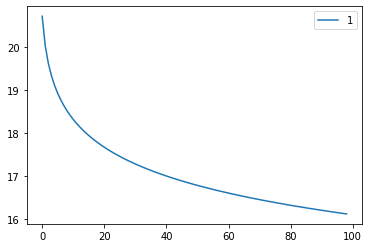

In [35]:
etas = [1]
weights=[]
for eta in etas:
    weights.append([eta*math.log((1-x)+1e09/x) for x in range(1,100)])

sns.lineplot(data=pd.DataFrame(weights, index = etas).T)

The above plot shows that the lower the number of errors (X) the greater the weight given to that classifer in the ensemble.

We gain the weight of each observation as below

$$w^i \gets \begin{cases} w^i if    \hat{y}^i_j=y^i \\
                      w^i e(a_j) if    \hat{y}y^i_j \neq y^i
            \end{cases}$$
            
Given that good classifiers have few observations that are incorrect. Few weights get updated, but if they do, the wieght is large. Where there are more missclassifications, more weights are updated but the value is lower. However, since the wieght is likely to be $> 1$ then these still have higher importance. 

To make predictions adaboost takes the majority of weighted votes across the ensemble.

$$\hat{y}(x) = argmax_k \sum^N_{j=1}a_j$$ 

Where N is the number of classifiers

Adaboost can overfit with the number of classifiers, unlike random forest that just hits a performance celing with number of estimators

In [43]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
n_estimators = range(100,5000,100)
ada_acc = []
rf_acc = []
for n in tqdm_notebook(n_estimators):
    
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                 n_estimators=n,
                                 algorithm="SAMME.R",
                                 learning_rate=0.5,
                                 random_state=42
                                )
    
    ada_clf.fit(X_train, y_train)
    y_pred = ada_clf.predict(X_test)
    ada_acc.append(accuracy_score(y_pred,y_test))
    
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    rf_acc.append(accuracy_score(y_pred,y_test))
    
    

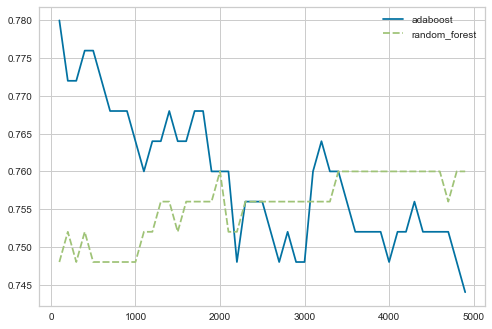

In [53]:
sns.lineplot(data=pd.DataFrame([ada_acc,rf_acc],
                               index = ["adaboost", "random_forest"],
                               columns = [x for x in range(100,5000,100)]).T
                               )

we can kind of see this here, random forest starts to outperform adaboost with larger ensemble sizes as adaboost overfits the data.

## Gradient boosting

Instead of correcting wieghts and changing the cost function, gradient boosting fits the new predictor to the residuals of the old model. This often works really well with regression tasks.

In [70]:
import matplotlib.pyplot as plt
import numpy as np

In [131]:
from sklearn.datasets import make_regression

In [159]:
X,y = make_regression(n_samples=1000, n_features=50)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [175]:
grad_oos_mse= []
grad_mse =[]
Y_train = y_train
y_test_preds = []
y_train_preds = [] 
n_estimators = 200
#create regressor
tree_reg = DecisionTreeRegressor(max_depth=2)
for n in tqdm_notebook(range(n_estimators)):
    # train a regressor
    tree_reg.fit(X_train, Y_train)
    # get predictions
    y_test_preds.append(tree_reg.predict(X_test))
    y_train_preds.append(tree_reg.predict(X_train))
    # next set of predictors are the residuals
    Y_train = Y_train - y_train_preds[-1]
    # sum the predicted values to get the estimates for the total ensemble so far
    grad_oos_mse.append(mean_squared_error(y_test,
                                           np.stack(y_test_preds).sum(axis=0)
                                          ))
    grad_mse.append(mean_squared_error(y_train,
                                           np.stack(y_train_preds).sum(axis=0)
                                          ))

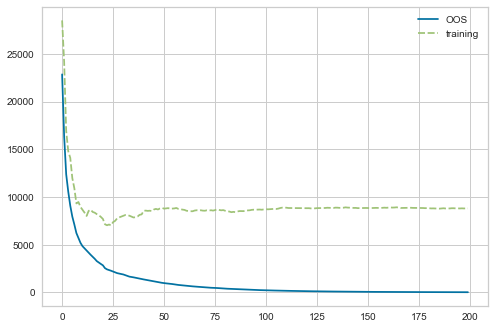

In [185]:
sns.lineplot(data=pd.DataFrame([grad_mse,grad_oos_mse],
                               index = ["OOS", "training"],
                               columns = [x for x in range(n_estimators)]).T
                               )



our ensemble gets better over time, looks like underfitting after around 20 though

or we use the sklearn class

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

Also implement early stopping using warm_start param and subsample, which is the size ratio of the random sample to train the data on - traiding higher bias for lower variance to avoid overfitting and speed benifits.

In [195]:
gb_mdl = GradientBoostingRegressor(max_depth=2, 
                                   n_estimators=2000,
                                   warm_start=True,
                                   subsample=0.25)
gb_mdl.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.25, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

In [196]:
errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gb_mdl.staged_predict(X_test)]

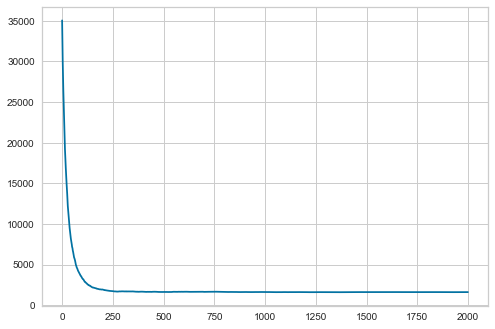

In [197]:
sns.lineplot(y=errors, x=[e for e in range(len(errors))])

## Stacking

Instead of using voting to find decisison in an ensemble, we can use another Model!

Or..... layers of models! Models on models on models! ...

... wait this basically sounds like a neural network.